In [1]:
# Homework 3 Data Analysis

In [8]:
## Imports

In [2]:
import os
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:
# Define trnascript folder
transcript_folder = 'data/transcripts/'

# 1.1 Collect 100 transcripts

In [4]:
# list out transcript files in the folder
transcript_files = []
for file in os.listdir(transcript_folder):
    print(file)
    if file.endswith('.txt'):
        transcript_files.append(file)
print(f'There are {len(transcript_files)} transcript txt files.')

-03_4aCeD3Y.en.vtt
-03_4aCeD3Y.txt
-Rh6cCX1nw8.en.vtt
-Rh6cCX1nw8.txt
0GXD_4XB0zg.en.vtt
0GXD_4XB0zg.txt
0L60gpg5_B0.en.vtt
0L60gpg5_B0.txt
155EsB752H0.en.vtt
155EsB752H0.txt
1lmXwSw7kqM.en.vtt
1lmXwSw7kqM.txt
2poereh9UYQ.en.vtt
2poereh9UYQ.txt
2YJA5miLnP8.en.vtt
2YJA5miLnP8.txt
3pw0D1XYU9E.en.vtt
3pw0D1XYU9E.txt
48ORwdWIjio.en.vtt
48ORwdWIjio.txt
4F10k0zvaUc.en.vtt
4F10k0zvaUc.txt
5KTiO6RxofE.en.vtt
5KTiO6RxofE.txt
64kYtfzjVBM.en.vtt
64kYtfzjVBM.txt
6J9-RpVrq_Q.en.vtt
6J9-RpVrq_Q.txt
6SwDJBkqDT8.en.vtt
6SwDJBkqDT8.txt
72VjM1L-H2k.en.vtt
72VjM1L-H2k.txt
732r755mGaM.en.vtt
732r755mGaM.txt
7m91EnBl7vg.en.vtt
7m91EnBl7vg.txt
7peQEVZJJUs.en.vtt
7peQEVZJJUs.txt
88seNGp7BNs.en.vtt
88seNGp7BNs.txt
8p3IqVNulhs.en.vtt
8p3IqVNulhs.txt
8vprBEKaXHc.en.vtt
8vprBEKaXHc.txt
9sBJ3vdz4-g.en.vtt
9sBJ3vdz4-g.txt
A6KttkIuCc4.en.vtt
A6KttkIuCc4.txt
Ae6U1wB4x0A.en.vtt
Ae6U1wB4x0A.txt
AVe9uX71ri0.en.vtt
AVe9uX71ri0.txt
AyydmSZ0W7k.en.vtt
AyydmSZ0W7k.txt
B330njMCEc4.en.vtt
B330njMCEc4.txt
BHD_4bHdjjo.en.vtt
B

In [5]:
# read in transcripts to a dataframe
transcripts = pd.DataFrame()
for file in transcript_files:
    with open(transcript_folder + file, 'r') as f:
        transcript = f.read()
    # the following line adds the transcript to the dataframe
    transcripts = pd.concat([transcripts, pd.DataFrame({'file': file,
    'transcript': transcript}, index=[0])])


# 1.2 Tokenize each transcript and get the total number of words in each.

In [6]:
import nltk
from nltk.tokenize import word_tokenize

# Read in the dataframe
df = transcripts

# Tokenize each transcript and calculate the total number of words
df['word_count'] = df['transcript'].apply(lambda x: len(word_tokenize(x)))

# Display the total number of words in each transcript
for index, row in df.iterrows():
    print(f"Transcript {index+1}: {row['word_count']} words")


Transcript 1: 284 words
Transcript 1: 933 words
Transcript 1: 4773 words
Transcript 1: 1617 words
Transcript 1: 843 words
Transcript 1: 586 words
Transcript 1: 1635 words
Transcript 1: 863 words
Transcript 1: 559 words
Transcript 1: 546 words
Transcript 1: 893 words
Transcript 1: 425 words
Transcript 1: 1186 words
Transcript 1: 767 words
Transcript 1: 352 words
Transcript 1: 851 words
Transcript 1: 1043 words
Transcript 1: 1221 words
Transcript 1: 1047 words
Transcript 1: 900 words
Transcript 1: 7576 words
Transcript 1: 756 words
Transcript 1: 1171 words
Transcript 1: 251 words
Transcript 1: 1089 words
Transcript 1: 849 words
Transcript 1: 720 words
Transcript 1: 705 words
Transcript 1: 512 words
Transcript 1: 811 words
Transcript 1: 612 words
Transcript 1: 787 words
Transcript 1: 1294 words
Transcript 1: 1428 words
Transcript 1: 1083 words
Transcript 1: 1718 words
Transcript 1: 712 words
Transcript 1: 2492 words
Transcript 1: 626 words
Transcript 1: 1442 words
Transcript 1: 799 words


# 1.3 Get the top 50 words from all transcripts

In [7]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Concatenate all the transcripts into a single string
all_transcripts = ' '.join(df['transcript'])

# Tokenize the string into individual words
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(all_transcripts)

# Remove stopwords
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in words if word.lower() not in stop_words]

# Count the frequency of each word
word_freq = Counter(words)

# Sort the words based on their frequency in descending order
top_words = word_freq.most_common(50)

# Print the top 50 words
for word, freq in top_words:
    print(word, freq)


uh 1369
know 740
think 710
going 508
um 494
really 375
right 371
us 317
well 317
like 301
see 296
year 294
people 269
lot 260
time 247
one 242
market 216
get 215
back 207
business 198
last 186
new 186
good 185
ai 181
things 176
company 168
look 162
want 162
actually 159
mean 159
first 158
great 157
years 155
much 150
yeah 149
also 149
would 145
got 142
growth 141
way 137
quarter 130
say 128
little 128
still 120
even 120
companies 117
big 117
today 115
seeing 114
go 113


# 1.4a Calculate the positive, negative, and neutral sentiment of the transcripts a. Get the average positive, negative, and neutral sentiment for all transcripts

In [8]:

# get positive sentiment of each transcript
sentiment_analyzer = SentimentIntensityAnalyzer()
transcripts['pos_sentiment'] =transcripts['transcript'].apply(lambda x:sentiment_analyzer.polarity_scores(x)['pos'])
average_pos_sentiment = transcripts['pos_sentiment'].mean()

# get negative sentiment of each transcript
sentiment_analyzer = SentimentIntensityAnalyzer()
transcripts['neg_sentiment']=transcripts['transcript'].apply(lambda x:sentiment_analyzer.polarity_scores(x)['neg'])
average_neg_sentiment = transcripts['neg_sentiment'].mean()

# get neutral sentiment of each transcript
sentiment_analyzer = SentimentIntensityAnalyzer()
transcripts['neu_sentiment']=transcripts['transcript'].apply(lambda x:sentiment_analyzer.polarity_scores(x)['neu'])
average_neu_sentiment = transcripts['neu_sentiment'].mean()

# 1.4b Plot the positive, negative, and neutral sentiment in a histogram

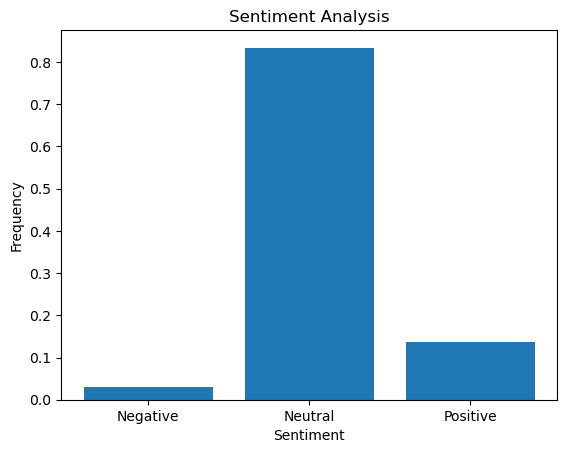

In [9]:
import matplotlib.pyplot as plt

# Sentiment values
sentiment_values = [average_neg_sentiment, average_neu_sentiment, average_pos_sentiment]

# Sentiment labels
sentiment_labels = ['Negative', 'Neutral', 'Positive']

# Plot histogram
plt.bar(sentiment_labels, sentiment_values)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.show()


# An outlier would be the negative sentiment for the low frequency.
# The neutral sentiment could also be considered an outlier due to the high frequency compared to positive and negative. 

In [11]:
# Read the CSV file
df = pd.read_csv('data/videos/metadata.csv')

# Q4.1 Get the average number of comments for the videos

# 4.2 Get the average number of likes for the videos

In [12]:
average_likes = df['like_count'].mean()
print(f"The average number of likes for the videos is: {average_likes}")


The average number of likes for the videos is: 91.7843137254902


# 4.3 Count the number of videos that were live

In [14]:
Total_live_videos = df['live_status']  == 'live' 
print(f"The total number of live videos is: {Total_live_videos.sum()}")

The total number of live videos is: 0
